Guillermo Corona González 
A01379689
Situacion problema 

Introduccion 
1.A lo largo de este reporte estructurado por distintas variables y códigos. Se buscara sacar la información más relevante de una base de datos, en este caso del COVID-19 en México. Donde se analizaran las variables tales como estado, días, mes, tiempo, año entre otras. Por otro lado, se planteara un escenario donde se contestaran las dos preguntas más significativas para sacar el mejor provecho de la base de datos tomando en cuentas las principales necesidades de los stakeholders.

2.Estudio de variables
Las variables críticas que se analizaron fueron: Estados, meses, años y casos diarios.

Variables discretas:
-Casos diarios

Variable cuantitativa:
-Años

Variables cualitativas:
-meses
-Estados


3.Modelos utilizados para predecir las variables críticas

Modelo de pastel y gráfica de barras

4.Escenarios que consideraste

-¿En qué estado se encuentra la mayor parte de la población infectada?
-¿Cuál es el estado que genera más casos diarios?
-¿En qué mes hubo más contagios de COVID?
-¿En qué mes y año se registraron menor cantidad de contagios?

5.Stakeholders

-Gobierno
-Empresas y negocios de la industria del sector salud y farmacéutica
-Ciudadanía
-Organizaciones internacionales como la ONU
-Países vecinos
-Sector aerocomercial

In [1]:
import numpy as ny
import pandas as pd 
import seaborn as sns

file_path = "datasets/SP Base de datos.csv"

df = pd.read_csv(file_path)
df.head()

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid
2,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,17,Morelos,2,0,1.285714,0.285714,0.000000,0.097845,0,solid
3,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,9,Ciudad de México,152,28,87.714287,18.428572,0.310468,1.685397,5,solid
4,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,15,Estado de México,58,7,36.285713,6.285714,0.040166,0.332802,2,solid


Pregunta 1.
¿Cual es el estado que genera más casos diarios?

In [2]:
data =df.sample(n=500,
                random_state=42)

In [3]:
data.shape

(500, 20)

In [4]:
#Para conocer las columnas que mi base de datos tiene.
data.columns

Index(['Year', 'Quarter ID', 'Quarter', 'Month ID', 'Month', 'Day', 'Time ID',
       'Time', 'Nation ID', 'Nation', 'State ID', 'State', 'Accum Cases',
       'Daily Cases', 'AVG 7 Days Accum Cases', 'AVG 7 Days Daily Cases',
       'Rate Daily Cases', 'Rate Accum Cases', 'Days from 50 Cases', 'Style'],
      dtype='object')

In [5]:
#Para visualizar toda mi base de datos
df.head()

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid
2,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,17,Morelos,2,0,1.285714,0.285714,0.000000,0.097845,0,solid
3,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,9,Ciudad de México,152,28,87.714287,18.428572,0.310468,1.685397,5,solid
4,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,15,Estado de México,58,7,36.285713,6.285714,0.040166,0.332802,2,solid


In [6]:
#Este paso no es necesario, se utiliza para solo llamar dos variables.
df.head(2)

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid


In [7]:
#Aquí llamo a la variable "Total" y poder graficar el total de casos por Estado.
df["Total"]=df.iloc[:,4:].sum(axis = 1)

In [8]:
#LLamo mi matplot para poder realizar mi gráfica
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")


In [9]:
df_State = df.groupby("State",
                      axis=0).sum()

In [10]:
#LLamo solo a la variable de estados 
df_State

,Year,Quarter ID,Month ID,Day,Time ID,State ID,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Total
State,,,,,,,,,,,,,,
Ciudad de México,1050628,1256,3233,8187,10506611487,4680,174749538,846661,1.722127e+08,842969.143315,9387.895873,1.937647e+06,137020,1.085736e+10
Estado de México,1050628,1256,3233,8187,10506611487,7800,74659011,316508,7.371048e+07,315285.428405,1816.110937,4.283906e+05,135460,1.065619e+10
Morelos,1050628,1256,3233,8187,10506611487,8840,8339619,39728,8.220523e+06,39596.571450,1943.584769,4.079933e+05,124251,1.052380e+10


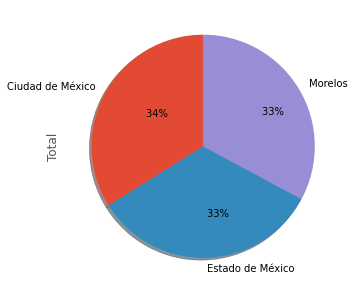

In [11]:
#Gráfica de pastel para conocer el Estado que más contagios tiene al día. Con la informacion de la variable "Total".
color_list=["gold,","yellowgreen","lightcoral","lightgreen","pink","red"]
expode_list =[0.1, 0, 0, 0, 0.2, 0.3]
df_State["Total"].plot(kind = "pie",
                      figsize=(5,6),
                      autopct="%10.lf%%",
                      startangle = 90,
                      shadow = True
                      )

Respuesta pregunta 1
El estado que genera más casos diarios es el la Ciudad de México, teniendo un total de 34%.

Pregunta 2.
¿En qué mes hubo más contagios de COVID?

In [12]:
#Importando la base de datos 
import numpy as ny
import pandas as pd 
import seaborn as sns

file_path = "datasets/SP Base de datos.csv"

df = pd.read_csv(file_path)
df.head()

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid
2,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,17,Morelos,2,0,1.285714,0.285714,0.000000,0.097845,0,solid
3,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,9,Ciudad de México,152,28,87.714287,18.428572,0.310468,1.685397,5,solid
4,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,15,Estado de México,58,7,36.285713,6.285714,0.040166,0.332802,2,solid


In [13]:
#Conociendo las columnas de la base de datos, no es importante este paso.
data.columns

Index(['Year', 'Quarter ID', 'Quarter', 'Month ID', 'Month', 'Day', 'Time ID',
       'Time', 'Nation ID', 'Nation', 'State ID', 'State', 'Accum Cases',
       'Daily Cases', 'AVG 7 Days Accum Cases', 'AVG 7 Days Daily Cases',
       'Rate Daily Cases', 'Rate Accum Cases', 'Days from 50 Cases', 'Style'],
      dtype='object')

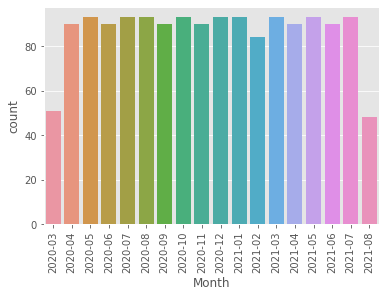

In [14]:
#Gráfica de barras para conocer el mes de más contagios.
sns.countplot(x ="Month",
             data = df)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

Respuesta pregunta 2
Al analizar la gráfica de barras, logre identificar los dos meses con más contagios que fueron el mes de diciembre del 2020 y el mes de enero del 2021.

Pregunta 3
¿En qué estado se encuentra la mayor parte de la población infectada?

In [15]:
#Importacion de datos
import numpy as ny
import pandas as pd 
import seaborn as sns

file_path = "datasets/SP Base de datos.csv"

df = pd.read_csv(file_path)
df.head()

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid
2,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,17,Morelos,2,0,1.285714,0.285714,0.000000,0.097845,0,solid
3,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,9,Ciudad de México,152,28,87.714287,18.428572,0.310468,1.685397,5,solid
4,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,15,Estado de México,58,7,36.285713,6.285714,0.040166,0.332802,2,solid


In [16]:
#Importo mi informacion para poder realizar mis gráficas
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")

In [17]:
df_State = df.groupby("State",
                      axis=0).sum()

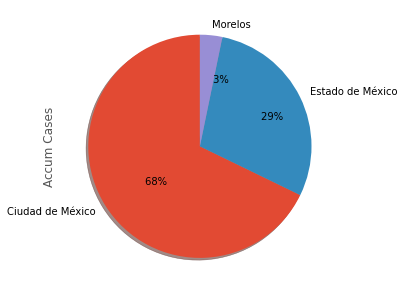

In [18]:
#Gráfica de pastel para conocer el estado con mayor poblacion infectada. Seleccionando el dato que quiero conocer "Accum Cases".
color_list=["gold,","yellowgreen","lightcoral","lightgreen","pink","red"]
expode_list =[0.1, 0, 0, 0, 0.2, 0.3]
df_State["Accum Cases"].plot(kind = "pie",
                      figsize=(5,6),
                      autopct="%10.lf%%",
                      startangle = 90,
                      shadow = True
                      )

Respuesta pregunta 3
Al terminar la gráfica de pastel, logre identificar que la Ciudad de México es el estado con más contagios en su población con un total de 68%.

Conclusión 
Al terminar de analizar y sacar los resultados, encontré varios puntos clave y de gran importancia para los stakeholders. El primero de ellos, es que el estado donde más casos por COVID hay al día es en la ciudad de México, colocando a Morelos y al Estado de México en segundo lugar ya que tienen el mismo porcentaje.

Por otro lado, al identificar los meses de contagio y sacar la gráfica de barras, me percate que los contagios suben y bajan siguiendo un patrón. Sabiendo así que en diciembre del 2020 y enero del 2021 hubo más contagios por COVID que los otros meses, gracias a las vacaciones. Del mismo modo, estos contagios empezaron a reducir debido a las vacunas ya aplicadas a los doctores  y no fue hasta julio del 2021 que las cifras bajaron drásticamente.

Por último al resolver la tercera pregunta, me percate que la Ciudad de México es el estado que cuenta con la mayor parte de la población infectada con un 64%. Lo que hace referencia a la pregunta uno que afirma que la Ciudad de México es el estado con más casos diarios de infeccion.